## Preprocesamiento

### Introducción
En el presente notebooks, vamos a realizar el preprocesamiento de los datos en detalle, para luego usar los dataframes resultantes en la realización de Análisis Exploratorio de Datos y Aprendizaje Supervisado

Alumnos: 
 * Abritta Carolina
 * Sittner Simon

In [1]:
#Importo las librerías necesarias para realizar el EDA.
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
sns.set_palette('pastel')

In [2]:
#Definimos las paletas a utilizar en los gráficos
palette = sns.color_palette("husl", 2)
palette2 = sns.color_palette("husl", 3)
cmap = sns.color_palette("husl", as_cmap=True)
sns.color_palette("husl")

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

In [3]:
#Importamos el dataframe le colocamos la columna de numeración como índice y verificamos las primeras filas

telco = pd.read_csv('telco_churn_clusterai.csv',index_col=0)
telco_df=pd.DataFrame(telco)

##### Verifico que se hayan cargado correctamente y veo que tipo de datos tienen

In [4]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [5]:
telco_df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,6127,6127.000000,6127,6127,6127.000000,6127,6127,6127,6127,...,7043,7043,7043,7043,5846,5846,5846,5846.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3082,NaN,3172,4294,NaN,5527,2954,2683,3012,...,3095,3473,2810,2785,3218,3476,2001,NaN,11,5174
mean,NaN,NaN,0.161580,NaN,NaN,32.539742,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.658655,NaN,NaN
std,NaN,NaN,0.368095,NaN,NaN,24.629822,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.046041,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.700000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.400000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.375000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.687500,NaN,NaN


In [6]:
#Se verifica el tamaño del dataset y se analiza su composición (imprimo el resultado)
np.shape(telco_df)
print(f'El tamaño del dataset es de '+str(np.shape(telco_df)[0]) + ' filas y ' +str(np.shape(telco_df)[1]) + ' columnas') 

El tamaño del dataset es de 7043 filas y 21 columnas


In [7]:
# Comprobamos los valores únicos de cada columna

for column in telco_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, telco_df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male' nan]
Column: SeniorCitizen - Unique Values: [nan  0.  1.]
Column: Partner - Unique Values: ['Yes' 'No' nan]
Column: Dependents - Unique Values: ['No' nan 'Yes']
Column: tenure - Unique Values: [ 1. 34.  2. nan  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 47. 72. 17. 27.  5. 46. 11. 70. 43. 60. 18. 63. 66.  9.  3. 31. 50. 64.
 56. 30. 45.  7. 42. 35. 48. 29. 12. 38. 32. 55. 37. 36. 41.  6.  4. 33.
 23. 57. 61. 65. 20. 53. 14. 15. 40. 59. 24. 44. 19. 54. 51. 67. 68. 26.
  0. 39.]
Column: PhoneService - Unique Values: ['No' 'Yes' nan]
Column: MultipleLines - Unique Values: ['No phone service' 'No' nan 'Yes']
Column: InternetService - Unique Values: ['DSL' nan 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' nan 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' nan 

In [8]:
# Frecuencia de valores únicos en las variables categóricas

for col in telco_df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(telco_df[col].value_counts())


Frecuencia de valores únicos de customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Frecuencia de valores únicos de gender
Male      3082
Female    3045
Name: gender, dtype: int64

Frecuencia de valores únicos de Partner
No     3172
Yes    2955
Name: Partner, dtype: int64

Frecuencia de valores únicos de Dependents
No     4294
Yes    1833
Name: Dependents, dtype: int64

Frecuencia de valores únicos de PhoneService
Yes    5527
No      600
Name: PhoneService, dtype: int64

Frecuencia de valores únicos de MultipleLines
No                  2954
Yes                 2579
No phone service     594
Name: MultipleLines, dtype: int64

Frecuencia de valores únicos de InternetService
Fiber optic    2683
DSL            2101
No             1343
Name: InternetService, dtype: int64

Frecuencia de valores únicos de OnlineSec

In [9]:
#Analizamos las columnas del dataframe, el tipo de dato y la presencia de nulos

telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6127 non-null   object 
 2   SeniorCitizen     6127 non-null   float64
 3   Partner           6127 non-null   object 
 4   Dependents        6127 non-null   object 
 5   tenure            6127 non-null   float64
 6   PhoneService      6127 non-null   object 
 7   MultipleLines     6127 non-null   object 
 8   InternetService   6127 non-null   object 
 9   OnlineSecurity    6127 non-null   object 
 10  OnlineBackup      6127 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          5846 non-null   object 
 16  PaperlessBilling  5846 non-null   object 


Se observa que la varialble 'TotalCharges', aperece como objeto y no como número, siendo esta los cargos totales, se procede a moficar dicha variable al formato correspondiente. Evitando futiros inconvenientes.

In [10]:
#Modifico la variable y verifico
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df['TotalCharges'].dtype

dtype('float64')

In [11]:
 #Contavilizo los nulos por cada variable, en el cambio de tipo de dato de la varibale 'TotalCharges', aparecieron 11 nulos.
telco_df.isnull().sum()

customerID             0
gender               916
SeniorCitizen        916
Partner              916
Dependents           916
tenure               916
PhoneService         916
MultipleLines        916
InternetService      916
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1197
PaperlessBilling    1197
PaymentMethod       1197
MonthlyCharges      1197
TotalCharges          11
Churn                  0
dtype: int64

In [12]:
#Elimno los nulls en TotalCharges y verifico el cambio

telco_df = telco_df[telco_df['TotalCharges'].notna()]
telco_df.isnull().sum()

customerID             0
gender               916
SeniorCitizen        915
Partner              915
Dependents           914
tenure               915
PhoneService         914
MultipleLines        914
InternetService      914
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1196
PaperlessBilling    1197
PaymentMethod       1194
MonthlyCharges      1196
TotalCharges           0
Churn                  0
dtype: int64

In [13]:
# Verificmos si existen duplicados, de existir quiere decir que la publicación está exactamente duplicada en todas sus columnas, por lo que de haber se eliminaran

telco_df.duplicated(subset = "customerID", keep = 'last').sum()

0

In [14]:
# Se quita "(automático)" a la denomiaciones de método de pago para acortar etiquetas.

telco_df['PaymentMethod'] = telco_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

<Axes: >

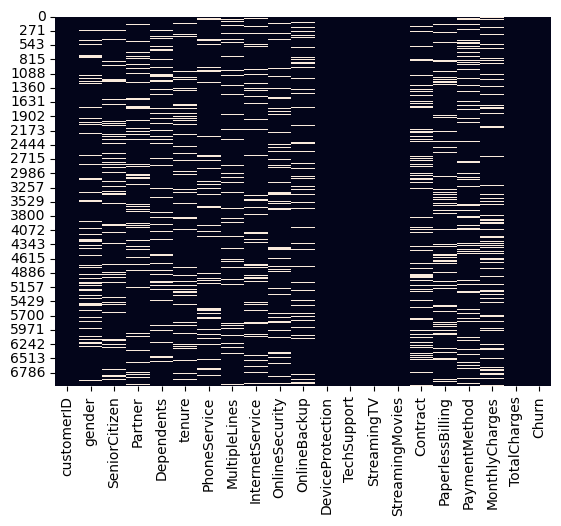

In [15]:
# Identificamos los missing values visualmente

sns.heatmap(telco_df.isnull(), cbar=False)

In [16]:
# Solo 7 variables no poseen nulos en sus registros, se droppea los registros y se verifica cuantos registros quedaran en un nuevo df
df_sn=telco_df.dropna()
np.shape(df_sn) 

(844, 21)

De elimnar todos los registros con nulos de los 7043 iniciciales solo quedarian 844, perdiendose casi un 90% de los datos, se procedera entoces a tratarlos de manera diferente

### Dealing with Nulls
Análisis de las feature como manejar el null


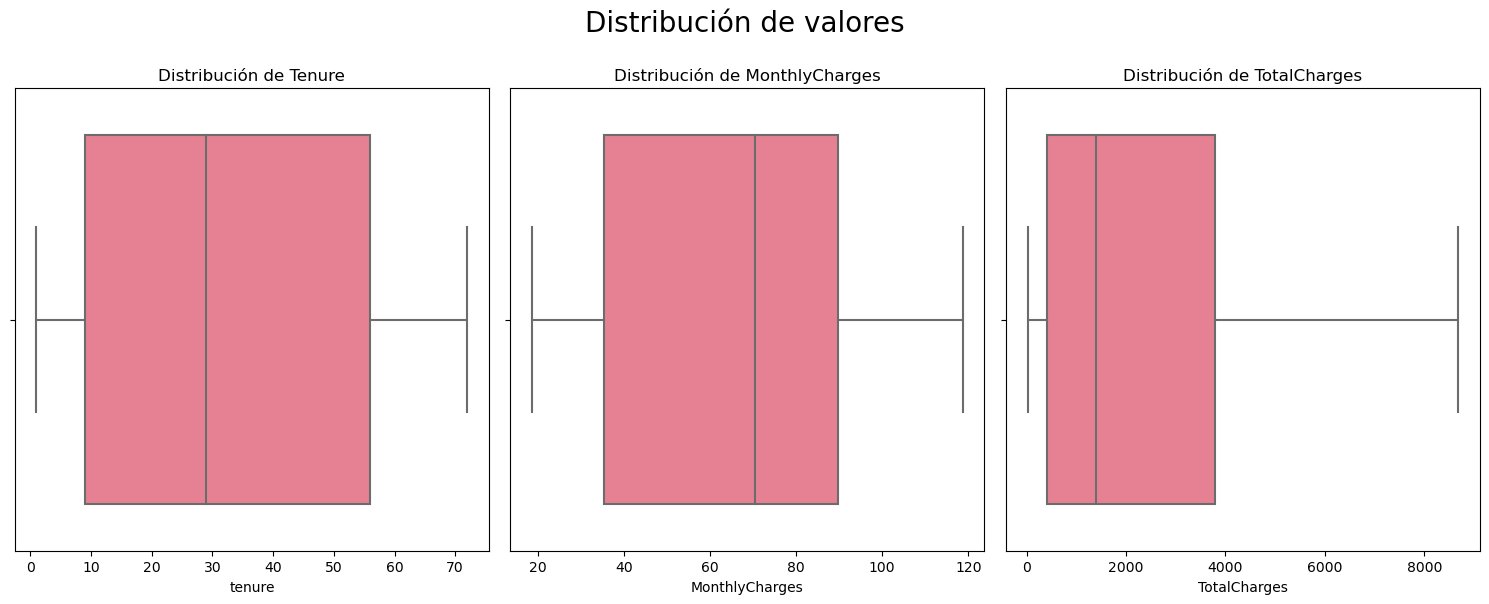

In [17]:
# Grafico boxplots de las variables numéricas, en busca de outliers
fig, axs = plt.subplots(ncols=3, figsize=(15,6))
fig.suptitle('Distribución de valores', fontsize=20, y=1.0)
sns.boxplot(x=telco_df['tenure'], ax=axs[0],palette=palette)
sns.boxplot(x=telco_df['MonthlyCharges'], ax=axs[1],palette=palette)
sns.boxplot(x=telco_df['TotalCharges'], ax=axs[2],palette=palette)
axs[0].set_title('Distribución de Tenure')
axs[1].set_title('Distribución de MonthlyCharges')
axs[2].set_title('Distribución de TotalCharges')
plt.tight_layout()
plt.show()

No se observan Outliers que consideremos que se tengan que eliminar.

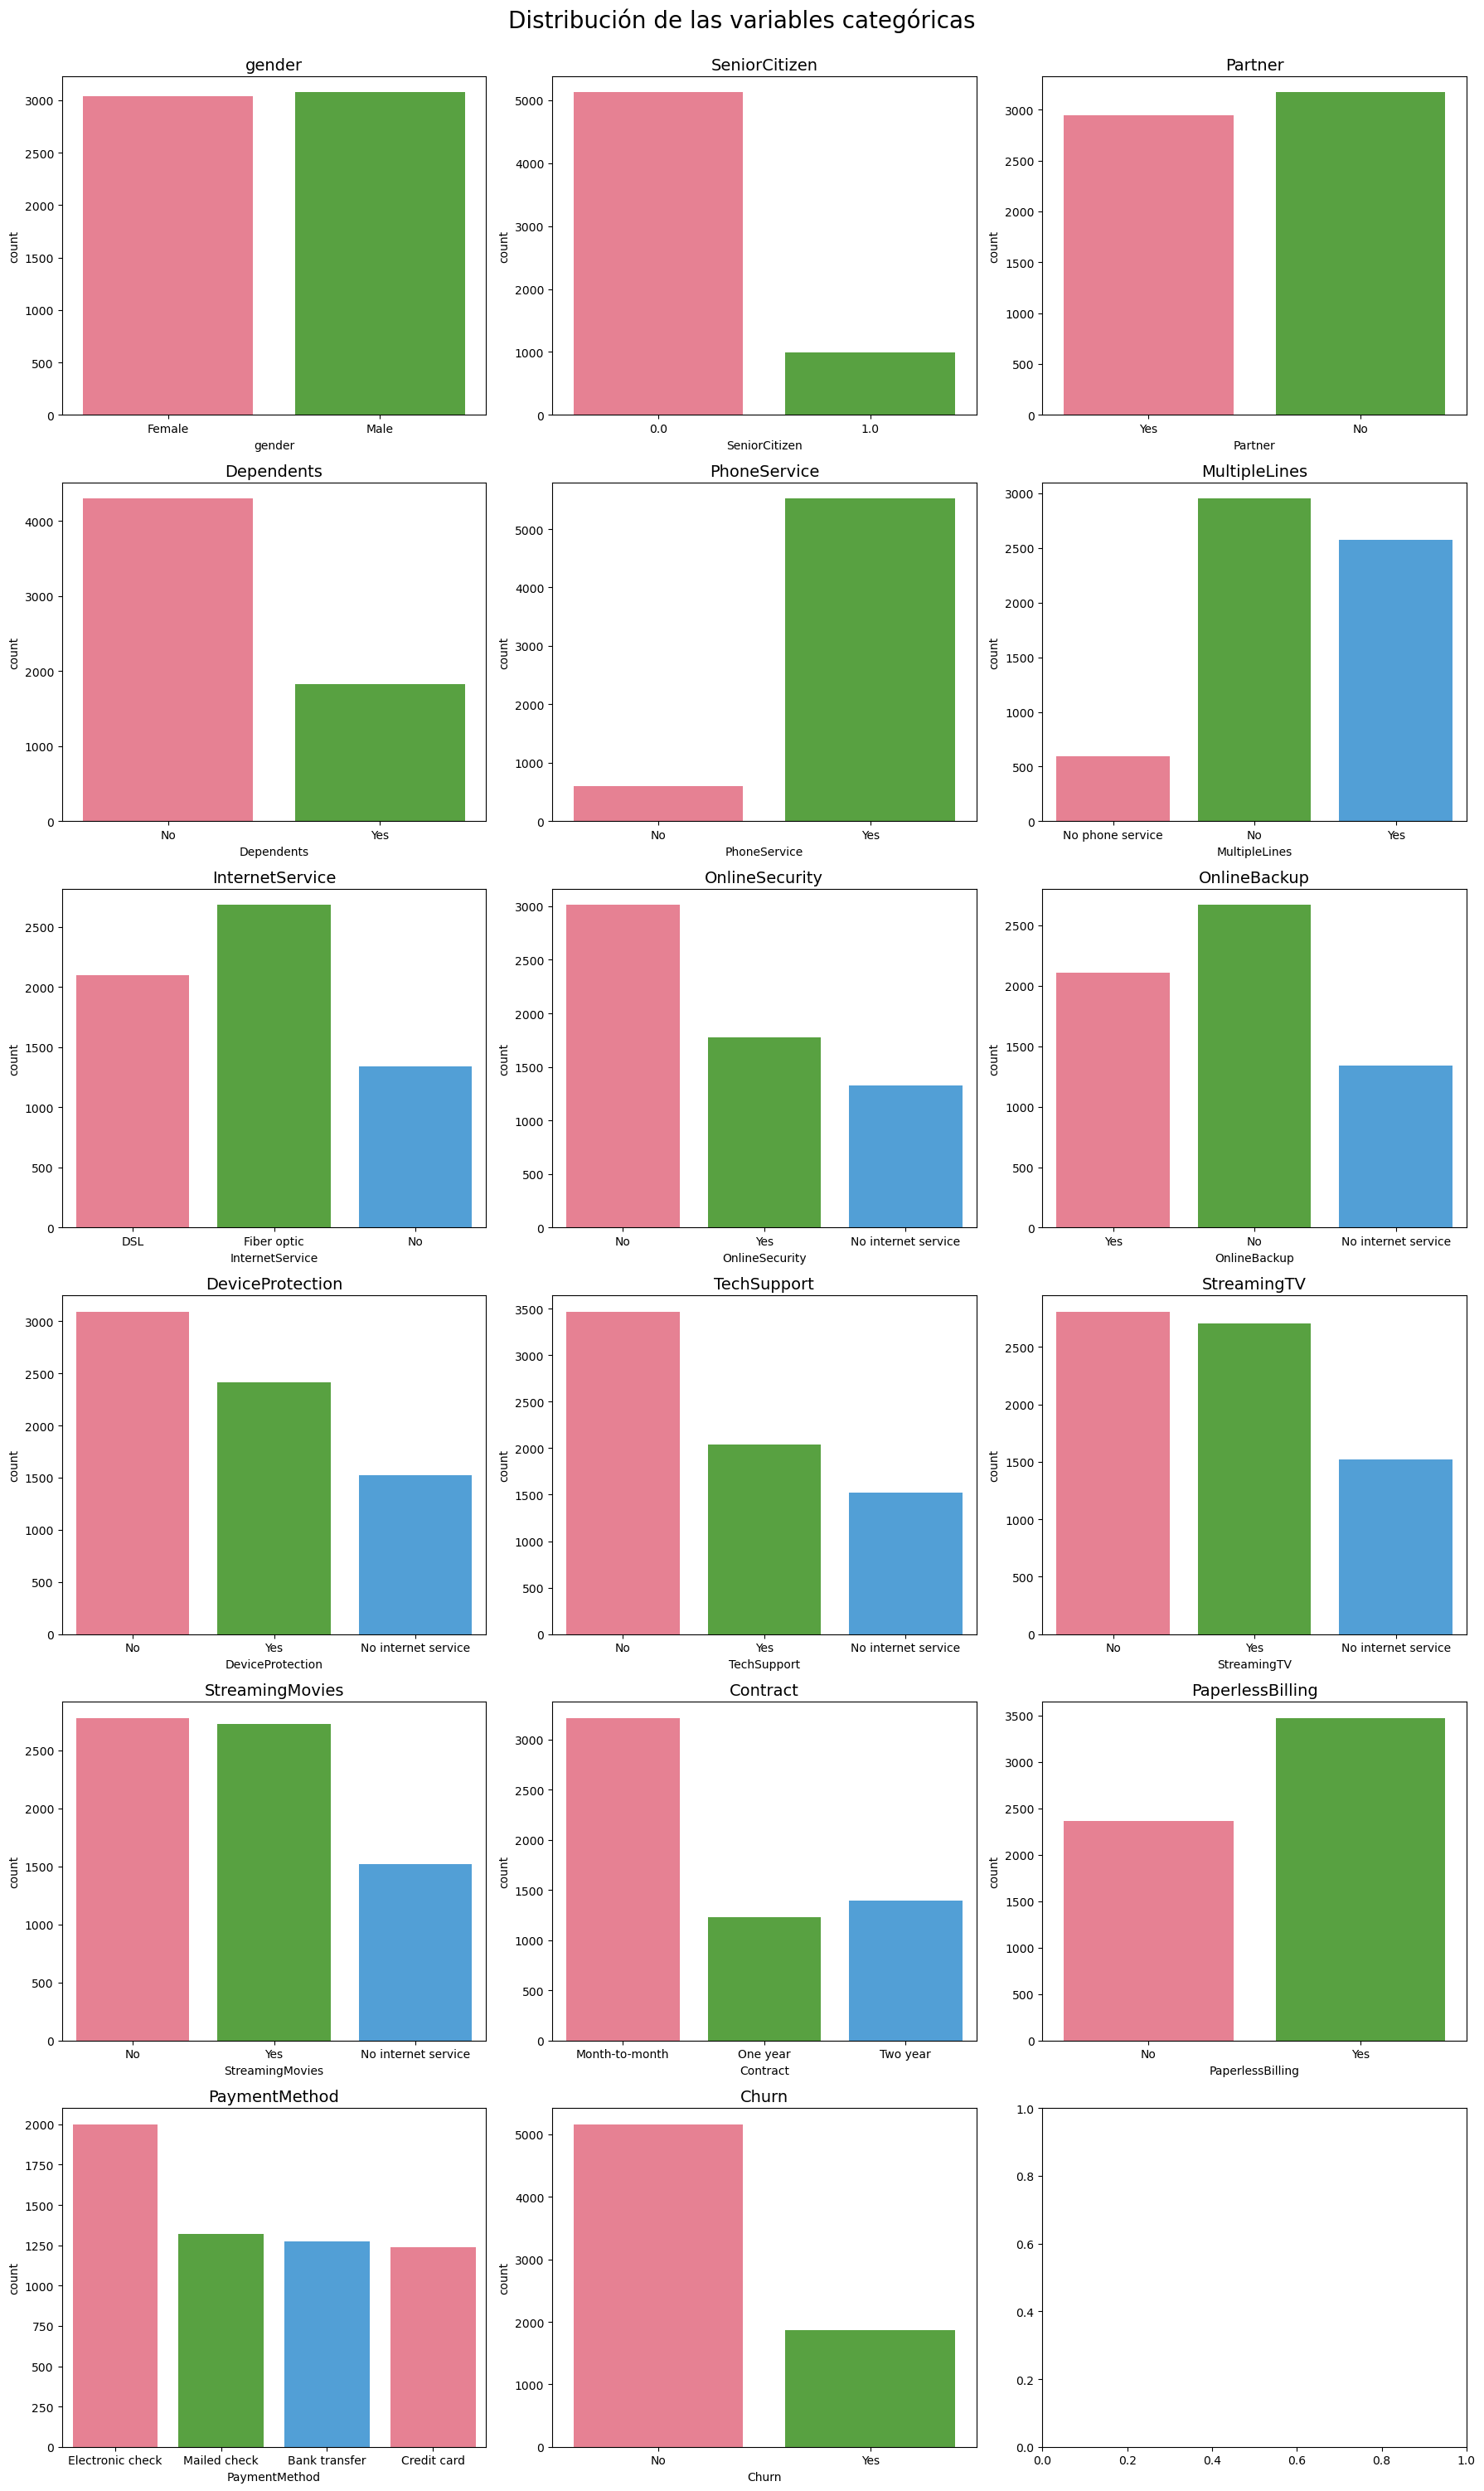

In [18]:
#Distribución de variables categóricas

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

# Variables categóricas
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=telco_df, ax=axs[row][pos],palette=palette2)
        axs[row][pos].set_title(col, fontsize=14)
    
plt.tight_layout()
plt.show()

#### Gender

<Axes: xlabel='Dependents', ylabel='count'>

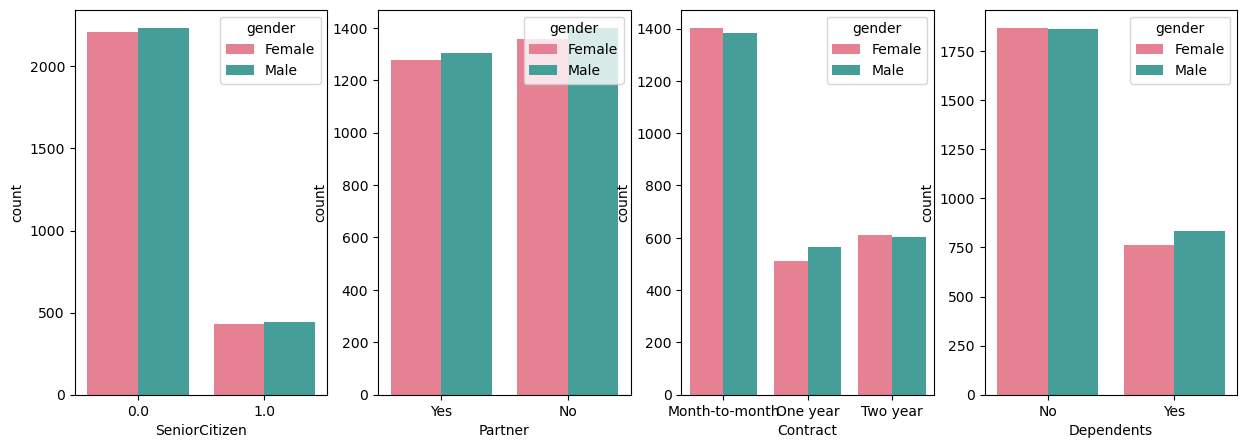

In [19]:
#Analizando los gráficos anteriores, el correspondietne a Gender, no se observa una clara tendencia hacia un género, antes de tomar alguna decisión, se verifica si hay diferencias en el género por otra variable categórica
fig, ax = plt.subplots(nrows=1,ncols=4,figsize = (15, 5))
sns.countplot(data=telco_df,x='SeniorCitizen',hue='gender',ax=ax[0],palette=palette)
sns.countplot(data=telco_df,x='Partner',hue='gender',ax=ax[1],palette=palette)
sns.countplot(data=telco_df,x='Contract',hue='gender',ax=ax[2],palette=palette)
sns.countplot(data=telco_df,x='Dependents',hue='gender',ax=ax[3],palette=palette)

<Axes: xlabel='gender', ylabel='count'>

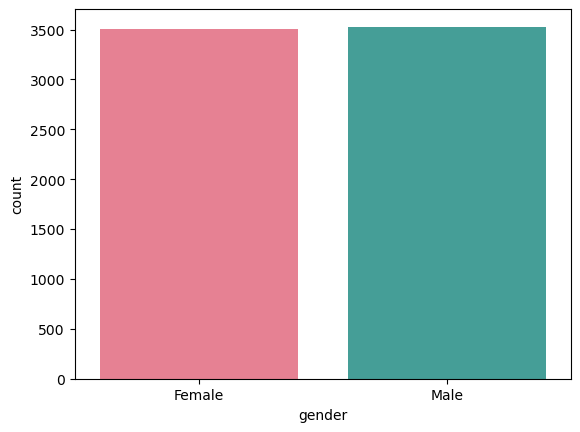

In [20]:
#No se espera un poder predictivo significativo la variable género. Se procede a llenar con el método 'filla'
telco_df['gender']=telco_df['gender'].ffill()

#Verifico no haya cambiado intrinsecamente los datos
sns.countplot(data=telco_df, x="gender", palette=palette)

### Senior Citizen y Dependents 

In [21]:
# Imputamos a aquellas variables con un valor muy predominante dicho valor a todos los registros faltantes.

telco_df['SeniorCitizen'].fillna(telco_df['SeniorCitizen'].mode()[0], inplace=True)
telco_df['Dependents'].fillna(telco_df['Dependents'].mode()[0], inplace=True)

### Contract
Lleno el tipo de contrato relacionandolo con el valor más frecuente en un rango de Total Charge.

In [22]:
 #Se evalua la cantidad de cada contrato  que su Cargo Total sea inferior a 
tot_m = telco_df.loc[telco_df['TotalCharges'] <= 1500]
tot_m.Contract.value_counts()

Month-to-month    2168
Two year           447
One year           416
Name: Contract, dtype: int64

In [23]:
#Completo el contract con el valor más frecuente para los total charges menores a 1500.
telco_df.loc[telco_df['TotalCharges'] <= 1500] = (telco_df.loc[telco_df['TotalCharges'] <= 1500].fillna(telco_df.loc[telco_df['TotalCharges'] <= 1500].Contract.mode()))
tot_mnew=telco_df.loc[telco_df['TotalCharges'] <= 1500]

tot_mnew.Contract.value_counts() #Corroboro que se hayan llenado los valores

Month-to-month    2168
Two year           447
One year           416
Name: Contract, dtype: int64

In [24]:
tot_3000 = telco_df.loc[(telco_df['TotalCharges'] > 3000)]
tot_3000.Contract.value_counts() #Los total charges mayores a 3000 son en su mayoría 

Two year          766
One year          572
Month-to-month    499
Name: Contract, dtype: int64

In [25]:
tot_3000.Contract.isnull().sum()

367

In [26]:
telco_df.loc[telco_df['TotalCharges'] >= 3000] = (telco_df.loc[telco_df['TotalCharges'] >= 3000].fillna(telco_df.loc[telco_df['TotalCharges'] >= 3000].Contract.mode()))

In [27]:
#Por último completo el resto de los valores con el valor más común entre 1500 y 3000 (One year)
telco_df.Contract = telco_df.Contract.fillna(telco_df.Contract.mode().iloc[0])

In [28]:
telco_df.Contract.isnull().sum()

0

### MultipleLines y PhoneService

Segun los valores únicos vistos, en 'MultipleLines' se indica 'No phone service', cuando no se tiene servicio, se procede a colocar 'No' a dichas columnas. Además como la persona que contrata el servicio de telefonía puede o no tener múltiples líneas, se procede a rellenar en un principio con "yes" en "PhoneService" si tiene "MultipleLines".

In [29]:
# Imputamos en 'PhoneService' → 'Yes' si 'MultipleLines'→ 'Yes' y 'No' si en 'MultipleLines' → 'No phone service'
telco_df['PhoneService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['PhoneService']) and row['MultipleLines'] == 'No phone service' else ("Yes" if pd.isnull(row['PhoneService']) and row['MultipleLines'] == "Yes" else row['PhoneService']), axis=1)

# Imputamos en 'MultipleLines'→ 'No' si en 'PhoneService' → 'No' 
telco_df['MultipleLines'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['MultipleLines']) and row['PhoneService'] == 'No'  else row['MultipleLines'], axis=1)

## InternetService y servicios extras

Según los valores únicos vistos, en los servicios extras (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) se indica 'No internet service', cuando no se tiene servicio, se procede a colocar 'No' a la columna 'InternetService'.


In [30]:
# Imputamos en 'InternetService' → 'No' si 'si en alguno de los servcio extras → 'No internet service'
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['OnlineSecurity'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['OnlineBackup'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['DeviceProtection'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['TechSupport'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['StreamingTV'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['StreamingMovies'] == 'No internet service' else row['InternetService'], axis=1)

## Monthly Charges y tenure

Monthlycharges se relaciona con el total charges / el tenure. Esto da el pago por mes promedio que hicieron durante la suscripción. Dicha relación no es exacta, pero es un buen estimador para llenar los valores nulos. Con la misma lógica se aplica para el tenure. Haciendo total charges /monthly charges

In [31]:
#Lleno el nulo con la división de total / meses
telco_df['MonthlyCharges']=telco_df['MonthlyCharges'].fillna(telco_df['TotalCharges']/telco_df['tenure']) 

In [32]:
#Lleno el nulo con la división de total / meses
telco_df['tenure']=telco_df['tenure'].fillna(telco_df['TotalCharges']/telco_df['MonthlyCharges']) #Lleno el nulo con la division de total / meses

In [33]:
telco_df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner              915
Dependents             0
tenure               157
PhoneService         493
MultipleLines        839
InternetService      732
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling    1197
PaymentMethod       1194
MonthlyCharges       157
TotalCharges           0
Churn                  0
dtype: int64

In [34]:
# Se Llenan nulos de manera aleatoria en las columnas, 'Partner', 'PaperlessBilling','PaymentMethod','InternetService','PhoneService' con base en su distribución
columnas_a_llenar = ['Partner','PhoneService', 'PaperlessBilling','PaymentMethod','InternetService','PhoneService', 'OnlineSecurity','OnlineBackup']
for columna in columnas_a_llenar:
    if telco_df[columna].isnull().any():
        distribucion_columna = telco_df[columna].value_counts(normalize=True)
        nulos_columna = telco_df[columna].isnull().sum()
        telco_df.loc[telco_df[columna].isnull(), columna] = np.random.choice(distribucion_columna.index, p=distribucion_columna.values, size=nulos_columna)

In [35]:
telco_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure              157
PhoneService          0
MultipleLines       839
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      157
TotalCharges          0
Churn                 0
dtype: int64

In [36]:
# Le vuelvo a imputar la condición en 'MultipleLines'→ 'No' si en 'PhoneService' → 'No'  y luego relleno con random respetando distribución. . 
telco_df['MultipleLines'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['MultipleLines']) and row['PhoneService'] == 'No'  else row['MultipleLines'], axis=1)

# Se Llenan nulos de manera aleatoria con base en su distribución

distribucion_MultipleLines = telco_df['MultipleLines'].value_counts(normalize=True)
nulos_MultipleLines = telco_df['MultipleLines'].isnull().sum()
telco_df.loc[telco_df['MultipleLines'].isnull(), 'MultipleLines'] = np.random.choice(distribucion_MultipleLines.index, p=distribucion_MultipleLines.values, size=nulos_MultipleLines)

In [37]:
telco_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure              157
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      157
TotalCharges          0
Churn                 0
dtype: int64

In [38]:
telco_df.dropna(inplace=True) #De esta manera recupero gran parte de los samples numéricos del dataset de una manera lógica.

In [39]:
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.000000,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.000000,Yes,No,No,Yes,...,Yes,No,No,No,One year,No,Mailed check,55.573529,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.000000,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,43.516548,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.300000,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.000000,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.000000,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,82.937500,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.000000,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.200000,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.000000,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.120968,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card,74.400000,306.60,Yes
